In [188]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import random

In [189]:
#Key stored in R
og_random=[x for x in range(256)]
og_ascii=[x for x in range(256)]
random.shuffle(og_random)
diff=np.array(og_random)-np.array(og_ascii)
og_key=[chr(x) for x in og_random]

In [190]:
print(og_random)
print(og_key)
print(diff)

[52, 54, 105, 11, 94, 12, 230, 158, 218, 89, 164, 167, 34, 155, 201, 59, 214, 142, 153, 53, 23, 160, 255, 66, 93, 109, 63, 199, 240, 51, 141, 10, 131, 208, 229, 29, 177, 143, 49, 220, 161, 2, 122, 194, 43, 77, 1, 73, 26, 64, 174, 188, 72, 6, 165, 60, 117, 248, 235, 76, 225, 5, 184, 81, 3, 247, 146, 173, 87, 92, 213, 48, 147, 187, 65, 99, 176, 61, 121, 113, 200, 41, 138, 32, 169, 57, 114, 15, 129, 33, 157, 170, 115, 239, 166, 95, 224, 189, 234, 163, 151, 123, 75, 124, 17, 84, 152, 118, 55, 78, 116, 171, 108, 182, 191, 249, 100, 110, 36, 168, 0, 46, 111, 254, 8, 253, 58, 101, 228, 103, 137, 71, 37, 25, 209, 205, 79, 120, 221, 50, 150, 236, 16, 195, 27, 202, 227, 183, 244, 145, 154, 9, 98, 192, 243, 136, 20, 14, 241, 19, 159, 237, 88, 38, 242, 85, 67, 35, 211, 68, 13, 162, 69, 172, 219, 252, 39, 130, 96, 135, 144, 222, 90, 70, 178, 197, 198, 217, 22, 245, 86, 126, 190, 128, 175, 112, 47, 250, 148, 30, 104, 140, 156, 238, 203, 231, 212, 180, 204, 181, 206, 82, 62, 56, 186, 210, 24, 215, 13

Max:  4464
Min:  256


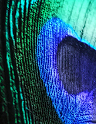

In [191]:
original_image=cv2.imread('/content/Screenshot 2024-03-24 184049.png',cv2.IMREAD_COLOR)
rows=original_image.shape[0]
cols=original_image.shape[1]
colors=original_image.shape[2]
print("Max: ",((original_image.size)//8))
print("Min: ",(len(og_key)))
og_img=cv2_imshow(original_image)
warped_image=original_image.reshape(1,original_image.size)

In [192]:
def binary(num):#converts a given decimal number to binary
  res=''
  x=8
  while(x>0):
    res=res+str(num%2)
    num=num//2
    x=x-1
  return res[::-1]

In [193]:
def decimal(stri):#converts a given binary 8 bit number to decimal
  res=0
  y=0
  for x in range(7,-1,-1):
    res=res+int(stri[x])*(2**y)
    y=y+1
  return res

In [194]:
#Converts the pixel values in the original image to binary
# Example pixel (3,7)=56 becomes 00111000
original_binary=[] # Stores the Original image where the pixel values are in Binary instead of decimal
for x in range(warped_image.shape[0]):
  for y in range(warped_image.shape[1]):
    original_binary.append(binary(warped_image[x][y]))
original_binary=np.array(original_binary).reshape(warped_image.shape[0],warped_image.shape[1])

In [195]:
def edit(edited,aa):# adds aa as the last digit in a binary array
  edited=[]
  for x in range(warped_image.shape[0]):
    for y in range(warped_image.shape[1]):
      edited.append(binary(warped_image[x][y])[0:7]+aa)
  edited=np.array(edited).reshape(warped_image.shape[0],warped_image.shape[1])
  return(edited)

In [196]:
def encoding(arr,a):#adds the array a which has binary to the 1st 7 digits on the binary original array
  for x in range(warped_image.shape[0]):
    for y in range(warped_image.shape[1]):
      arr[x][y]=str((arr[x][y])[0:7]+a[x][y])
  return arr

In [229]:
def decode(arr):#takes the LSB of the entire array and returns a binary string
  arr=arr.reshape(warped_image.shape[0],warped_image.shape[1])
  cpy=arr.copy()
  a=''
  for x in range(warped_image.shape[0]):
    for y in range(warped_image.shape[1]):
      a=a+(binary(arr[x][y])[-1])
  ar=''#takes 8 bits from the binary string and converts it into decimal which then converts ascii to character and returns the character string
  for x in range(0,len(a),8):
    ar=ar+str((chr(decimal(a[x:x+8]))))
  key=ar[:256]
  keys=np.zeros(256)
  og=[x for x in range(256)]
  og=np.array(og)
  for x in range(len(key)):
    keys[x]=ord(key[x])
  keys=np.array(keys)
  message=ar[256:]
  diff=keys-og
  res=''
  #c=int(diff[ord(message[x])]-ord(message[x]))
  for x in range(len(message)):
    for y in range(len(diff)):
      if message[x]==chr(int(keys[y])):
        c=int(ord(message[x])-diff[y])
        res=res+chr(c)
  return res

In [198]:
def key_write(key_ascii,codes):#Converts the original string to coded string using the difference key
  codex=codes[256:]
  res=codes[:256]
  for x in range(len(codex)):
    res=res+chr(ord(codex[x])+diff[ord(codex[x])])
  return res

In [204]:
print("Max: ",(warped_image.shape[0]*warped_image.shape[1])//8-256," Characters")
code=''
for x in og_key:
  code=code+x
code=code+"On a seemingly ordinary morning, the tranquility of a bustling metropolis was abruptly shattered by a series of coordinated terrorist attacks. Explosions reverberated through the streets, sending shockwaves of panic and chaos rippling through the heart of the city. Buildings crumbled, flames engulfed the skyline, and the once-bustling thoroughfares were transformed into scenes of devastation and despair. Amidst the chaos, emergency responders heroically sprang into action, risking their lives to rescue survivors and restore order to the stricken city. In the aftermath, as the smoke cleared and the full extent of the carnage became painfully apparent, a somber mood descended upon the community, leaving behind scars that would take years to heal and a haunting reminder of the ever-looming specter of terrorism."#The code to be encrypted
code=code[:(warped_image.shape[0]*warped_image.shape[1])//8]
l=len(code)#Stores length of code
ll=''#empty string
for x in range(warped_image.shape[0]*warped_image.shape[1]//8-l):
  ll=ll+' '
code=code+ll#completes the coded message to leave the rest of them as empty
coded_key=key_write(diff,code)
code=coded_key
last=''#Stores the code in a bianry
lasts=[]#converts stored binary into an array
for x in code:
  last=last+(binary(ord(x)))
for l in last:
  lasts.append(l)
lala=np.array(lasts).reshape(warped_image.shape[0],warped_image.shape[1])
divide=lala
edited=edit(original_binary,'0')#stores a binary image withouth the LSB as '0'
a=encoding(edited,divide)#add the 1st 7 bits of edited and the 8th bit is divide
hidden=[]#Stores the final result with encoded message
for x in range(warped_image.shape[0]):
  for y in range(warped_image.shape[1]):
    hidden.append(decimal(a[x][y]))
hidden=np.array(hidden).reshape(warped_image.shape[0],warped_image.shape[1])#list to array to reshape
hidden=hidden.reshape(rows,cols,colors)

Max:  4208  Characters


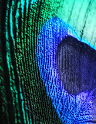

'On a seemingly ordinary morning, the tranquility of a bustling metropolis was abruptly shattered by a series of coordinated terrorist attacks. Explosions reverberated through the streets, sending shockwaves of panic and chaos rippling through the heart of the city. Buildings crumbled, flames engulfed the skyline, and the once-bustling thoroughfares were transformed into scenes of devastation and despair. Amidst the chaos, emergency responders heroically sprang into action, risking their lives to rescue survivors and restore order to the stricken city. In the aftermath, as the smoke cleared and the full extent of the carnage became painfully apparent, a somber mood descended upon the community, leaving behind scars that would take years to heal and a haunting reminder of the ever-looming specter of terrorism.                                                                                                                                                                                    

In [230]:
Hidden_image=cv2_imshow(hidden)
decode(hidden)